# 📊 Employee Attrition Analysis and Prediction – Part 2: Exploratory Data Analysis (EDA)

This notebook presents the **Exploratory Data Analysis (EDA)** stage in a 3-part pipeline designed to analyze and predict employee attrition using the IBM HR Analytics dataset.

The goal of this stage is to understand the structure of the data, identify key patterns, and discover potential predictors of employee attrition. We'll visualize distributions, relationships, and correlations between features and the target variable.

---

## 🔄 Notebook Series Overview:

🧹 **Part 1 – Data Preprocessing**  
➡️ Load, clean, and prepare the data for analysis  
📂 Output: `cleaned_attrition_dataset.csv`

📊 **Part 2 – Exploratory Data Analysis (this notebook)**  
- Visualize feature distributions  
- Explore attrition trends across departments, age, overtime, and more  
- Identify important relationships and outliers

🤖 **Part 3 – Predictive Modeling & Insights** _(coming soon)_  
- Train classification models  
- Evaluate performance metrics  
- Extract HR insights from model interpretation

---

## 📁 Dataset:
- Cleaned dataset from Part 1 (`cleaned_attrition_dataset.csv`)
- Original Source: [IBM HR Analytics – Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

---

## 📈 Tools Used:
- **Python**: Pandas, Matplotlib, Seaborn, SciPy
- **Environment**: Jupyter Notebook

---

📌 This step helps build a strong understanding of the data before modeling.

--- 
### Import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency

ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

## 📊 Exploratory Data Analysis (EDA)

In this section, we will investigate the cleaned IBM Employee Attrition dataset to discover meaningful patterns and relationships between employee attributes and attrition. The goals are to:
- Understand the data through visual and statistical methods
- Identify factors strongly associated with attrition
- Select the most relevant features for predictive modeling

---
### 1. Load Original & Preprocessed Datasets

We'll load the original and preprocessed datasets for exploratory data analysis.

In [2]:
# Load Original Data
attrition_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Load Preprocessed Data
cleaned_attrition_data = pd.read_csv("cleaned_attrition_dataset.csv")

### 2. Attrition Distribution

We begin by examining the distribution of the target variable: `Attrition`.

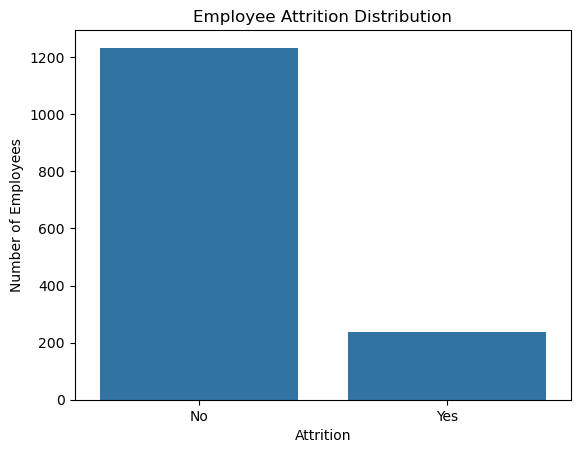

Attrition Distribution (%):
 Attrition
0    83.88
1    16.12
Name: proportion, dtype: float64


In [3]:
# Count Plot + Percentages
sns.countplot(data=cleaned_attrition_data, x='Attrition')
plt.title('Employee Attrition Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Number of Employees')
plt.show()

# Print percentages
attrition_rate = cleaned_attrition_data['Attrition'].value_counts(normalize=True) * 100
print("Attrition Distribution (%):\n", attrition_rate.round(2))

---
### 3. Correlation Analysis

We’ll examine how features are correlated with each other, especially with Attrition.

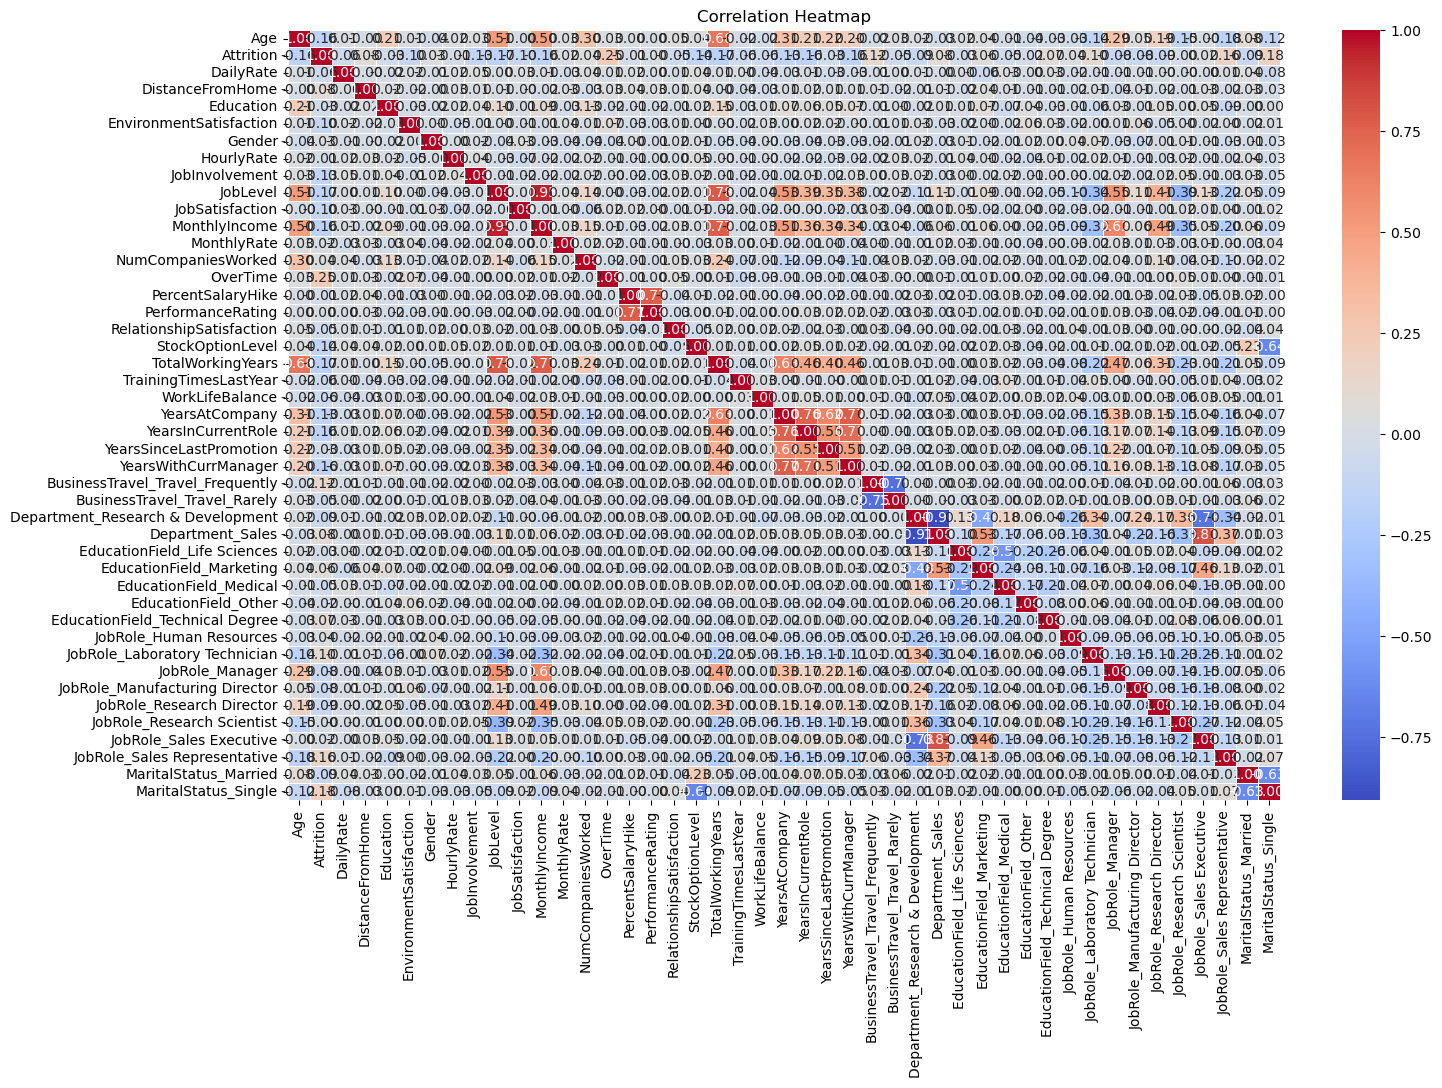

Top Positive Correlations with Attrition:
 OverTime                            0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
Name: Attrition, dtype: float64

Top Negative Correlations with Attrition:
 Age                  -0.159205
MonthlyIncome        -0.159840
YearsInCurrentRole   -0.160545
JobLevel             -0.169105
TotalWorkingYears    -0.171063
Name: Attrition, dtype: float64


In [4]:
# Correlation Matrix
corr = cleaned_attrition_data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Top correlated features with Attrition
corr_target = corr['Attrition'].drop('Attrition').sort_values(ascending=False)
print("Top Positive Correlations with Attrition:\n", corr_target.head())
print("\nTop Negative Correlations with Attrition:\n", corr_target.tail())

---
### 4. Numerical Features vs Attrition

We'll explore how key numeric features differ between employees who stayed and those who left.


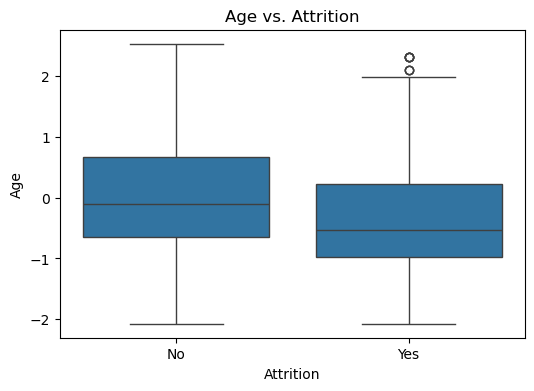

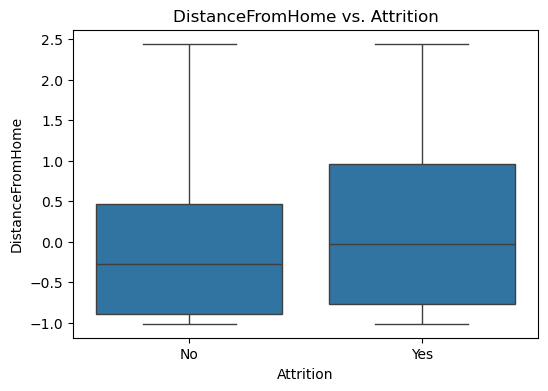

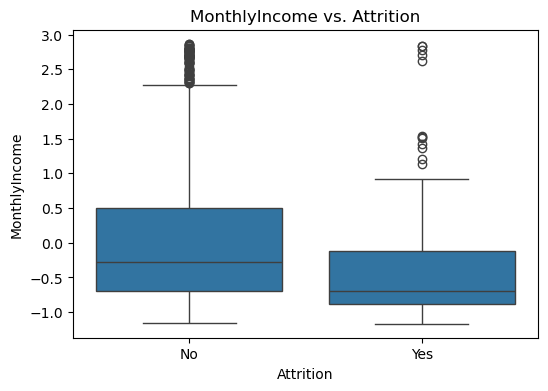

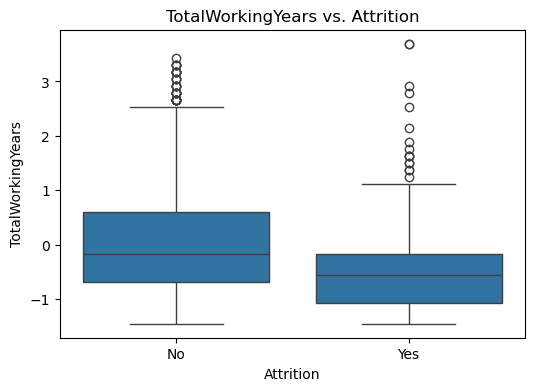

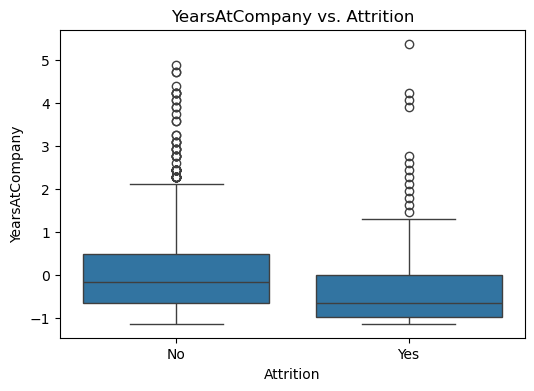

In [5]:
# Boxplots
features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Attrition', y=feature, data=cleaned_attrition_data)
    plt.title(f'{feature} vs. Attrition')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

---
### 5. Categorical Features vs Attrition

Let’s visualize attrition rates across categorical features like Gender, OverTime, JobLevel, and others. 

> **Note:**  
> Some categorical features such as `Education`, `JobLevel`, and `WorkLifeBalance` are represented as numerical codes in the original Kaggle dataset. According to the dataset's official description, these numeric values correspond to meaningful categorical labels (e.g., `1 = Below College`, `4 = Master`).  
>
> For the purpose of data visualization and exploratory analysis, we apply mapping to convert these codes into human-readable labels. This mapping is used **only for visualization** and does not affect the encoded dataset used for machine learning model training.



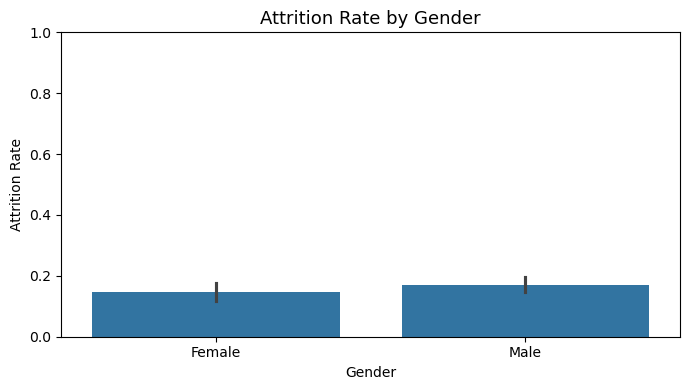

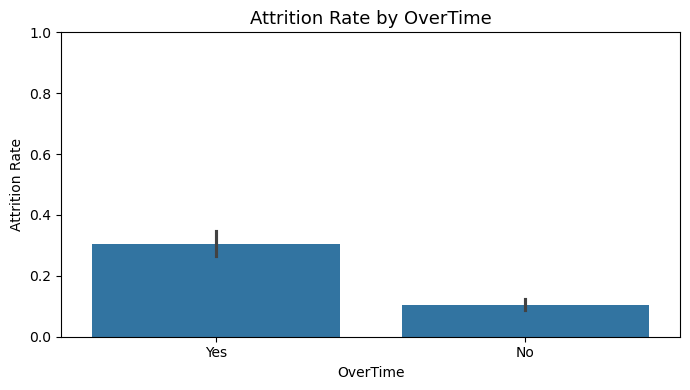

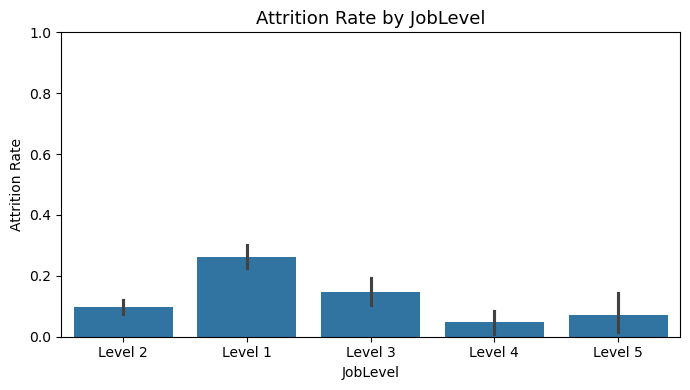

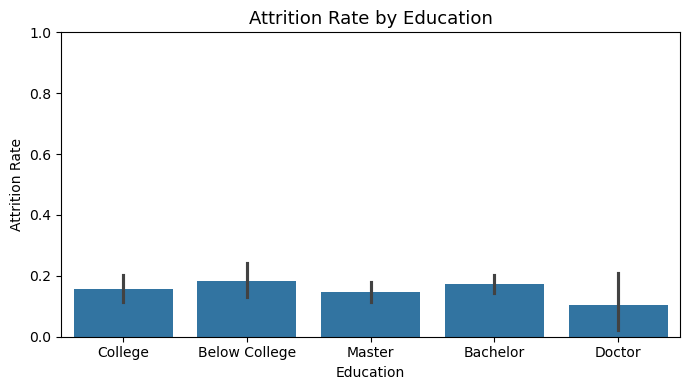

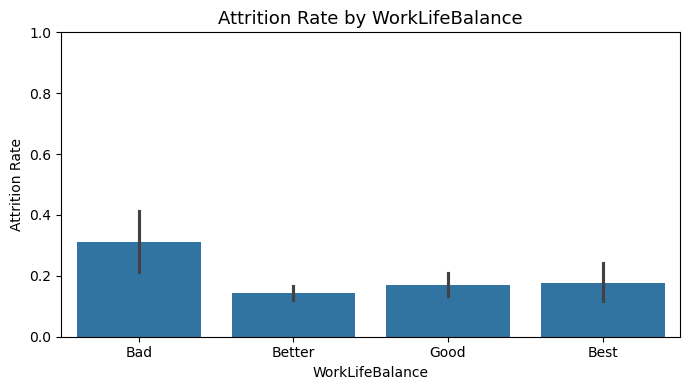

In [6]:
# Mapping dictionaries
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

joblevel_map = {
    1: 'Level 1',
    2: 'Level 2',
    3: 'Level 3',
    4: 'Level 4',
    5: 'Level 5'
}

worklife_map = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

# Apply to dataframe copy for this visualization
viz_data = attrition_data.copy()

# Apply mapping
viz_data['Education'] = viz_data['Education'].map(education_map)
viz_data['JobLevel'] = viz_data['JobLevel'].map(joblevel_map)
viz_data['WorkLifeBalance'] = viz_data['WorkLifeBalance'].map(worklife_map)
viz_data['Attrition'] = viz_data['Attrition'].map({'No': 0, 'Yes': 1})

# Bar Charts
categorical = ['Gender', 'OverTime', 'JobLevel', 'Education', 'WorkLifeBalance']

for col in categorical:
    plt.figure(figsize=(7, 4))
    sns.barplot(x=col, y='Attrition', data=viz_data)
    plt.title(f'Attrition Rate by {col}', fontsize=13)
    plt.ylabel('Attrition Rate')
    plt.xlabel(col)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

---
### 6. Statistical Analysis

We use hypothesis testing to find statistically significant differences:
- **T-test** for numeric features (e.g., Age)
- **Chi-squared test** for categorical features (e.g., OverTime)


In [7]:
# T-test: Age vs Attrition
attr_yes = cleaned_attrition_data[cleaned_attrition_data['Attrition'] == 1]['Age']
attr_no = cleaned_attrition_data[cleaned_attrition_data['Attrition'] == 0]['Age']

t_stat, p_val = ttest_ind(attr_yes, attr_no)
print(f"T-test p-value for Age vs Attrition: {p_val:.5f}")

T-test p-value for Age vs Attrition: 0.00000


In [8]:
# Chi-squared test: OverTime vs Attrition
ct = pd.crosstab(cleaned_attrition_data['OverTime'], cleaned_attrition_data['Attrition'])
chi2, p, dof, ex = chi2_contingency(ct)
print(f"Chi-squared p-value for OverTime vs Attrition: {p:.5f}")

Chi-squared p-value for OverTime vs Attrition: 0.00000


---
### 🔍 7. Key Insights from EDA

- **Attrition Rate**: ~16% of employees left the company.
- **Top Factors Correlated with Attrition**:
  - `OverTime` (positive)
  - `MonthlyIncome` (negative)
  - `TotalWorkingYears` (negative)
  - `DistanceFromHome` (positive)
  - `YearsAtCompany` (negative)
- **Statistical Significance**:
  - Age has a significant difference (p < 0.05) between attrition groups.
  - OverTime is significantly associated with attrition (p < 0.05).
- **Employees who left** tend to:
  - Work more overtime
  - Be younger
  - Have fewer total working years and lower income
---
### ✅ 8. Selected Features for Prediction

Based on visual analysis, correlation scores, and statistical tests, the following features are selected:

- OverTime
- MonthlyIncome
- TotalWorkingYears
- Age
- JobLevel
- DistanceFromHome
- YearsAtCompany
- WorkLifeBalance
- Education
- BusinessTravel (encoded)
- JobRole (encoded)
- MaritalStatus (encoded)

These variables show the strongest and most consistent relationship with attrition and will be used in model training.

---

## ✅ Summary

In this notebook, we:
- Explored distributions of key features like Age, Department, and Job Role
- Identified relationships between features and attrition
- Highlighted trends such as:
  - Higher attrition among younger employees
  - Strong impact of overtime and job satisfaction
- Gained insights that guide feature selection and modeling

---

## ⏭️ Next Step

Proceed to **Part 3: Predictive Modeling & Insights**  
➡️ [Link to Modeling Notebook](https://github.com/omarmamdouhismaiel/Employee-Attrition-Analysis-and-Prediction/blob/d12979297322ca547d0632fbd71ed43cb905b1bc/Part%203%20-%20Predictive%20Modeling%20%26%20Insights.ipynb) *

We'll use the cleaned dataset and selected features to train machine learning models and provide actionable recommendations for HR.